# Modeling 1: Titanic

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
os.chdir("C:\\Users\\123\\Desktop\\")
os.getcwd()

'C:\\Users\\123\\Desktop'

In [3]:
train = pd.read_csv(r"C:\\Users\\123\\Desktop\\타이타닉\\train.csv")
test = pd.read_csv(r"C:\\Users\\123\\Desktop\\타이타닉\\test.csv")
submission = pd.read_csv(r"C:\\Users\\123\\Desktop\\타이타닉\\submission.csv")

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### Null data 처리 시 고려사항
#### 컬럼을 삭제할 것인지, 유지할 것인지 다음의 과정을 통해 분석하고 결정
- 해당 컬럼 내 Null data 비중이 얼마나 되는지?
- 해당 컬럼이 Y와 어느 정도 상관관계가 있는지?

- 유지해야 한다면 어떤 값으로 채워야 할지 의사결정
- 삭제해야 한다면 왜 삭제되어야 하는지 근거 마련

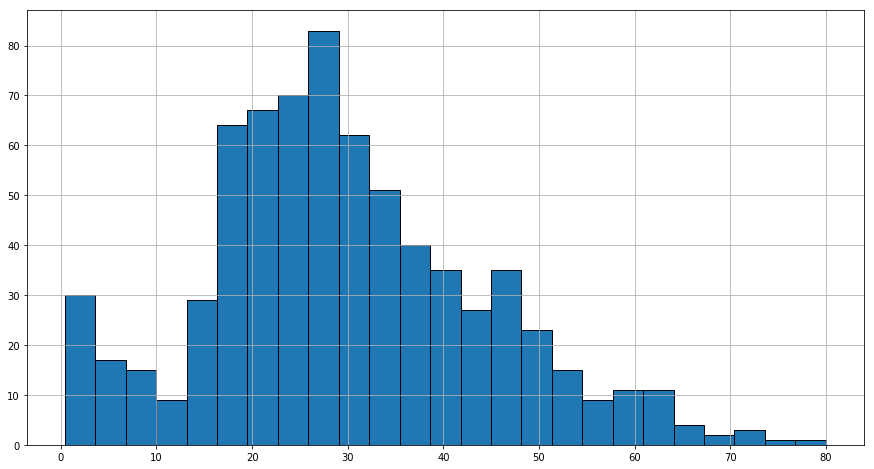

In [11]:
plt.figure(figsize=(15, 8))
train['Age'].hist(edgecolor='black', bins=25)

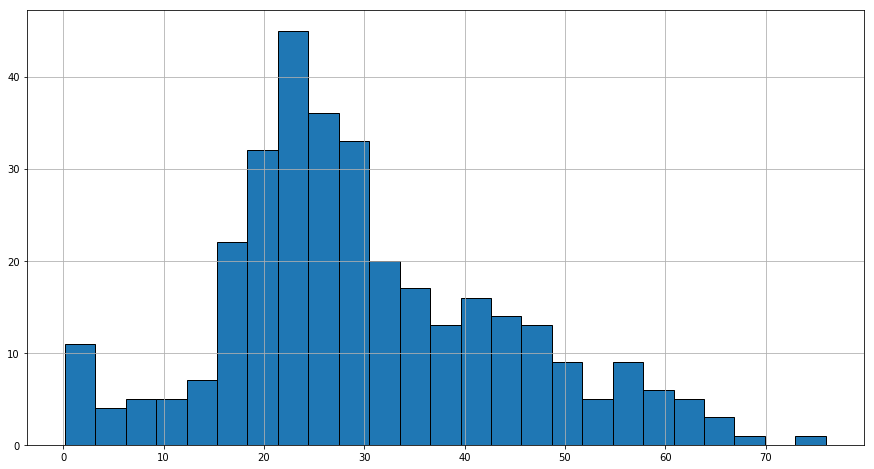

In [12]:
plt.figure(figsize=(15, 8))
test['Age'].hist(edgecolor='black', bins=25)

In [13]:
# train set & test set 모두 평균연령으로 채워넣는 경우
train['Age'] = train['Age'].fillna(train['Age'].mean())
test['Age'] = test['Age'].fillna(test['Age'].mean())

# Null data를 지워야 하는 경우엔 아래 코드 사용
# train = train.dropna(subset=['Age'])

In [14]:
# 남자 1, 여자 0 과 같이 int로 치환
train['Sex'] = np.where(train['Sex'] == 'male', 1, 0)
test['Sex'] = np.where(test['Sex'] == 'male', 1, 0)

In [15]:
# Embarked 컬럼에 Null data 확인
train[train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",0,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",0,62.0,0,0,113572,80.0,B28,NaN


In [16]:
# 두 명 모두 1등석, 여성, 생존, 홀로 탑승이라는 공통점 있음
# 다만, 1명은 38세, 다른 1명은 62세로 비슷한 연령대(10년 범위) 어디서 탑승했는지 확인

embarked_test1 = train[((train['Survived'] == 1) & (train['Pclass'] == 1) & (train['Sex'] == 0) & (train['Age'] >= 30) & (train['Age'] < 40) & (train['SibSp'] == 0))]
embarked_test1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",0,38.0,0,0,113572,80.0000,B28,NaN
218,219,1,1,"Bazzani, Miss. Albina",0,32.0,0,0,11813,76.2917,D15,C
257,258,1,1,"Cherry, Miss. Gladys",0,30.0,0,0,110152,86.5000,B77,S
258,259,1,1,"Ward, Miss. Anna",0,35.0,0,0,PC 17755,512.3292,NaN,C
269,270,1,1,"Bissette, Miss. Amelia",0,35.0,0,0,PC 17760,135.6333,C99,S
309,310,1,1,"Francatelli, Miss. Laura Mabel",0,30.0,0,0,PC 17485,56.9292,E36,C
318,319,1,1,"Wick, Miss. Mary Natalie",0,31.0,0,2,36928,164.8667,C7,S
325,326,1,1,"Young, Miss. Marie Grice",0,36.0,0,0,PC 17760,135.6333,C32,C
520,521,1,1,"Perreault, Miss. Anne",0,30.0,0,0,12749,93.5000,B73,S
537,538,1,1,"LeRoy, Miss. Bertha",0,30.0,0,0,PC 17761,106.4250,NaN,C


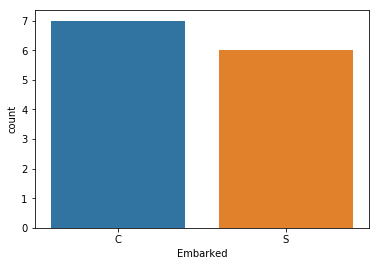

In [17]:
# 유의미한 차이가 보이지 않음, Chebourg 7명, Southampton 6명
sns.countplot(x='Embarked', data=embarked_test1)

In [18]:
# 62세 여성의 경우에도 마찬가지로 장소에 대한 유의미한 결과는 나오지 않음
embarked_test2 = train[((train['Survived'] == 1) & (train['Pclass'] == 1) & (train['Sex'] == 0) & (train['Age'] >= 50) & (train['SibSp'] == 0))]
embarked_test2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
11,12,1,1,"Bonnell, Miss. Elizabeth",0,58.0,0,0,113783,26.5500,C103,S
195,196,1,1,"Lurette, Miss. Elise",0,58.0,0,0,PC 17569,146.5208,B80,C
268,269,1,1,"Graham, Mrs. William Thompson (Edith Junkins)",0,58.0,0,1,PC 17582,153.4625,C125,S
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",0,50.0,0,1,PC 17558,247.5208,B58 B60,C
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",0,62.0,0,0,113572,80.0000,B28,NaN
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",0,56.0,0,1,11767,83.1583,C50,C


In [19]:
# 많은 데이터가 아니므로, 가장 많은 Chebourg로 통일하기로 함
train['Embarked'] = train['Embarked'].fillna('C')

In [20]:
# Cabin은 사용하지 않을 컬럼이므로 별도 처리 안 함
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [21]:
train = train.drop(['Name', 'Ticket', 'Cabin'], axis=1)
test = test.drop(['Name', 'Ticket', 'Cabin'], axis=1)

In [22]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.000000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.000000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.000000,3.0,3.0000
Sex,891.0,0.647587,0.477990,0.00,0.0000,1.000000,1.0,1.0000
Age,891.0,29.699118,13.002015,0.42,22.0000,29.699118,35.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.000000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.000000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.454200,31.0,512.3292


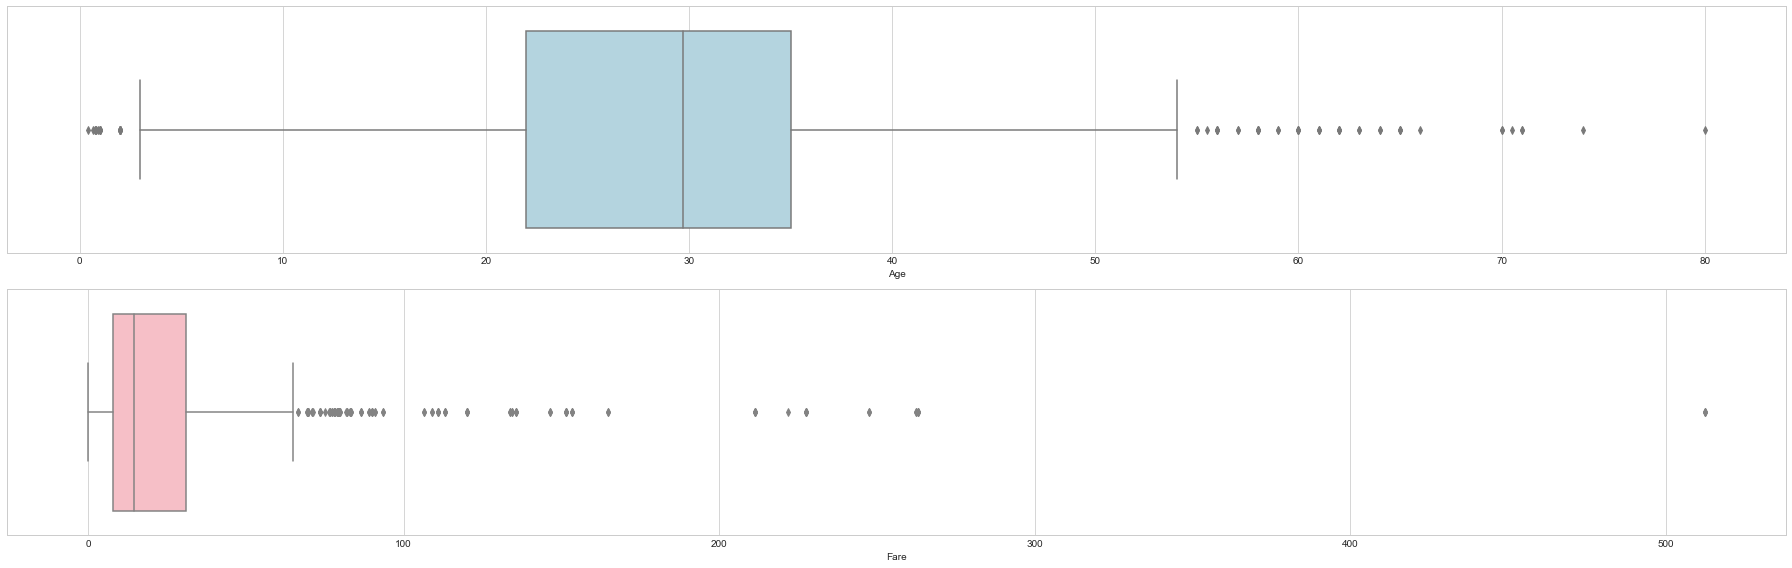

In [23]:
plt.style.use('seaborn-whitegrid')

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(25, 8))
sns.boxplot(x='Age', data=train, color='lightblue', ax=ax[0])
sns.boxplot(x='Fare', data=train, color='lightpink', ax=ax[1])

plt.tight_layout()
plt.show()

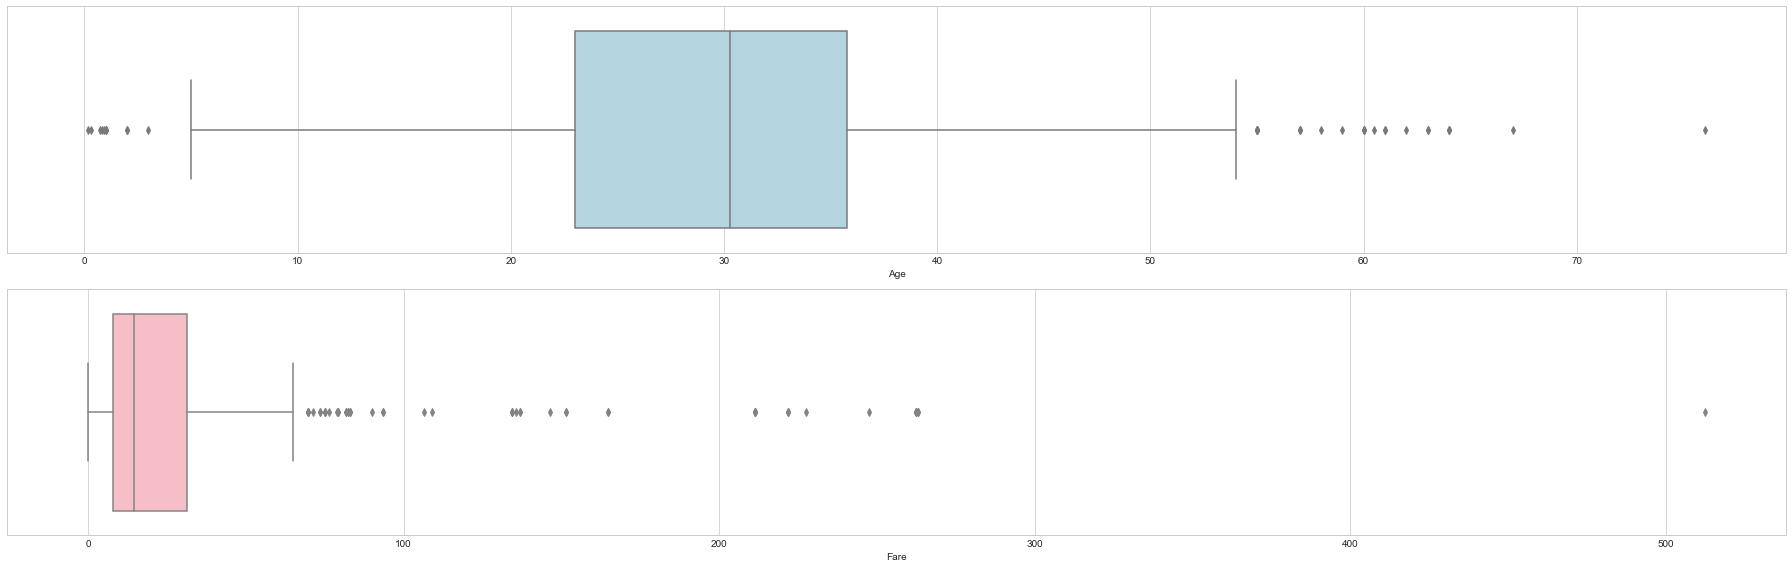

In [24]:
plt.style.use('seaborn-whitegrid')

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(25, 8))
sns.boxplot(x='Age', data=test, color='lightblue', ax=ax[0])
sns.boxplot(x='Fare', data=test, color='lightpink', ax=ax[1])

plt.tight_layout()
plt.show()

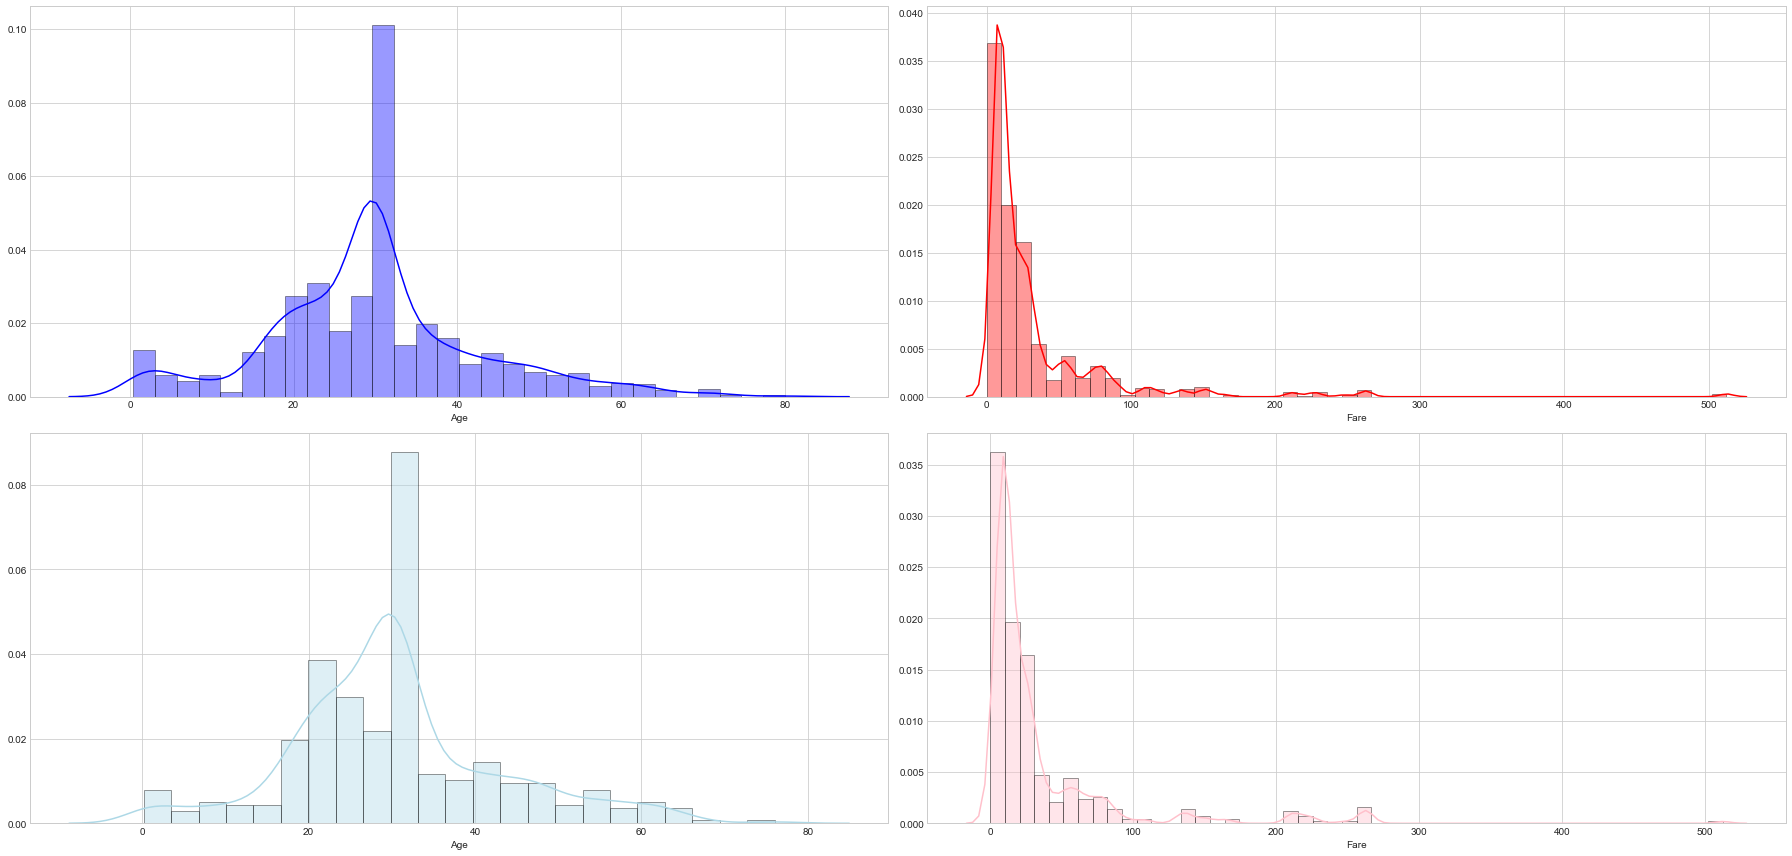

In [25]:
plt.style.use('seaborn-whitegrid')

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(25, 12))
sns.distplot(train['Age'], hist_kws=dict(edgecolor='black', linewidth=1), color='blue', ax=ax[0][0])
sns.distplot(train['Fare'], hist_kws=dict(edgecolor='black', linewidth=1), color='red', ax=ax[0][1])
sns.distplot(test['Age'], hist_kws=dict(edgecolor='black', linewidth=1), color='lightblue', ax=ax[1][0])
sns.distplot(test['Fare'], hist_kws=dict(edgecolor='black', linewidth=1), color='pink', ax=ax[1][1])

plt.tight_layout()
plt.show()

In [26]:
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [27]:
# 결측치, 이상치 처리가 모두 완료되었으면 인코딩/스케일링 작업을 진행

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
ohe.fit(train[['Embarked']])
ohe_transformed = ohe.transform(train[['Embarked']])

In [28]:
ohe_transformed_df = pd.DataFrame(ohe_transformed, columns=['Embarked_C', 'Embarked_Q', 'Embarked_S'])

In [29]:
train.reset_index(drop=True, inplace=True)
ohe_transformed_df.reset_index(drop=True, inplace=True)

In [30]:
train2 = pd.concat([train, ohe_transformed_df], axis=1)
train2 = train2.drop(['Embarked'], axis=1)

In [31]:
from sklearn.model_selection import train_test_split

feature = train2.drop(['PassengerId', 'Survived'], axis=1)
label = train2['Survived']

X_train, X_test, y_train, y_test = train_test_split(feature, label, test_size=0.2, stratify=label)

In [33]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

712
179
712
179


In [34]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
573,3,0,29.699118,0,0,7.7500,0.0,1.0,0.0
534,3,0,30.000000,0,0,8.6625,0.0,0.0,1.0
684,2,1,60.000000,1,1,39.0000,0.0,0.0,1.0
832,3,1,29.699118,0,0,7.2292,1.0,0.0,0.0
517,3,1,29.699118,0,0,24.1500,0.0,1.0,0.0


In [35]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
543,2,1,32.0,1,0,26.00,0.0,0.0,1.0
494,3,1,21.0,0,0,8.05,0.0,0.0,1.0
94,3,1,59.0,0,0,7.25,0.0,0.0,1.0
141,3,0,22.0,0,0,7.75,0.0,0.0,1.0
149,2,1,42.0,0,0,13.00,0.0,0.0,1.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()
X_train_scaled = minmax_scaler.fit_transform(X_train[['Age', 'Fare']])
# X_test_scaled = minmax_scaler.transform(X_val)

In [ ]:
Fare_scaled = pd.DataFrame(X_train_scaled, columns=['Age_scaled', 'Fare_scaled'])
Fare_scaled.head()

In [ ]:
X_train_new = pd.concat([X_train.reset_index(), Fare_scaled], axis=1)
X_train_new = X_train_new.drop(['Age', 'Fare'], axis=1)
X_train_new

In [ ]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()
X_val_scaled = minmax_scaler.fit_transform(X_val[['Age', 'Fare']])
# X_test_scaled = minmax_scaler.transform(X_val)X_val

Fare_scaled = pd.DataFrame(X_val_scaled, columns=['Age_scaled', 'Fare_scaled'])
Fare_scaled.head()

X_val_new = pd.concat([X_val.reset_index(), Fare_scaled], axis=1)
X_val_new = X_val_new.drop(['Age', 'Fare'], axis=1)

X_val_new = X_val_new.drop('index', axis=1)
X_val_new.rename(columns={'Age_scaled':'Age', 'Fare_scaled':'Fare'})
X_val_new.head()

In [ ]:
X_train_new = X_train_new.drop('index', axis=1)
X_train_new.rename(columns={'Age_scaled':'Age', 'Fare_scaled':'Fare'})

In [ ]:
X_train_new.head()

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier 

In [37]:
dct = DecisionTreeClassifier(min_samples_leaf=50)
rfc = RandomForestClassifier()
gbc = GradientBoostingClassifier()
xgb = XGBClassifier()
gbm = LGBMClassifier()
ann = MLPClassifier()

In [38]:
import warnings
warnings.filterwarnings('ignore')

dct.fit(X_train, y_train)
rfc.fit(X_train, y_train)
gbc.fit(X_train, y_train)
xgb.fit(X_train, y_train)
gbm.fit(X_train, y_train)
ann.fit(X_train, y_train)

[00:24:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [39]:
pred_proba_dct = dct.predict_proba(X_test)
pred_proba_rfc = rfc.predict_proba(X_test)
pred_proba_gbc = gbc.predict_proba(X_test)
pred_proba_xgb = xgb.predict_proba(X_test)
pred_proba_gbm = gbm.predict_proba(X_test)
pred_proba_ann = ann.predict_proba(X_test)

pred_proba_num_dct = pred_proba_dct[:,1]
pred_proba_num_rfc = pred_proba_rfc[:,1]
pred_proba_num_gbc = pred_proba_gbc[:,1]
pred_proba_num_xgb = pred_proba_xgb[:,1]
pred_proba_num_gbm = pred_proba_gbm[:,1]
pred_proba_num_ann = pred_proba_ann[:,1]

pred_dct = dct.predict(X_test)
pred_rfc = rfc.predict(X_test)
pred_gbc = gbc.predict(X_test)
pred_xgb = xgb.predict(X_test)
pred_gbm = gbm.predict(X_test)
pred_ann = ann.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc

model_list = [pred_dct, pred_rfc, pred_gbc, pred_xgb, pred_gbm, pred_ann]
model_name = ['DECISION TREE', 'RANDOM FOREST', 'GRADIENT BOOST', 'XG BOOST', 'LIGHT GBM', 'NEURAL NETWORK']

for pred, name in zip(model_list, model_name):
    print('='*50)
    print(f'MODEL: {name}')
    print('-'*50)
    print('METRICS')
    print(f'Accuracy:\t {accuracy_score(y_test, pred):.4f}')
    print(f'Precision:\t {precision_score(y_test, pred):.4f}')
    print(f'Recall:\t\t {recall_score(y_test, pred):.4f}')
    print(f'F1:\t\t {f1_score(y_test, pred):.4f}')
    print('-'*50)
    print('CONFUSION MATRIX')
    print(confusion_matrix(y_test, pred))
    print('-'*50)
    print('CLASSIFICATION REPORT')
    print(classification_report(y_test, pred))


MODEL: DECISION TREE
--------------------------------------------------
METRICS
Accuracy:	 0.7709
Precision:	 0.8043
Recall:		 0.5362
F1:		 0.6435
--------------------------------------------------
CONFUSION MATRIX
[[101   9]
 [ 32  37]]
--------------------------------------------------
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.76      0.92      0.83       110
           1       0.80      0.54      0.64        69

   micro avg       0.77      0.77      0.77       179
   macro avg       0.78      0.73      0.74       179
weighted avg       0.78      0.77      0.76       179

MODEL: RANDOM FOREST
--------------------------------------------------
METRICS
Accuracy:	 0.7709
Precision:	 0.7258
Recall:		 0.6522
F1:		 0.6870
--------------------------------------------------
CONFUSION MATRIX
[[93 17]
 [24 45]]
--------------------------------------------------
CLASSIFICATION REPORT
              precision    recall  f1-score   support



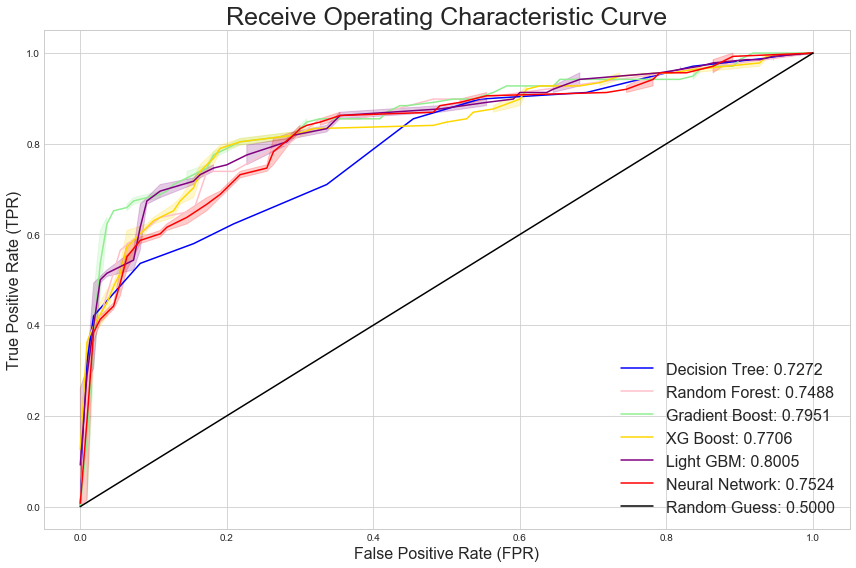

In [44]:
plt.style.use('seaborn-whitegrid')

fpr_dct, tpr_dct, threshold = roc_curve(y_test, pred_proba_num_dct)
fpr_rfc, tpr_rfc, threshold = roc_curve(y_test, pred_proba_num_rfc)
fpr_gbc, tpr_gbc, threshold = roc_curve(y_test, pred_proba_num_gbc)
fpr_xgb, tpr_xgb, threshold = roc_curve(y_test, pred_proba_num_xgb)
fpr_gbm, tpr_gbm, threshold = roc_curve(y_test, pred_proba_num_gbm)
fpr_ann, tpr_ann, threshold = roc_curve(y_test, pred_proba_num_ann)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))
sns.lineplot(x=fpr_dct, y=tpr_dct, color='blue', ax=ax, label=f'Decision Tree: {roc_auc_score(y_test, pred_dct):.4f}')
sns.lineplot(x=fpr_rfc, y=tpr_rfc, color='pink', ax=ax, label=f'Random Forest: {roc_auc_score(y_test, pred_rfc):.4f}')
sns.lineplot(x=fpr_gbc, y=tpr_gbc, color='lightgreen', ax=ax, label=f'Gradient Boost: {roc_auc_score(y_test, pred_gbc):.4f}')
sns.lineplot(x=fpr_xgb, y=tpr_xgb, color='gold', ax=ax, label=f'XG Boost: {roc_auc_score(y_test, pred_xgb):.4f}')
sns.lineplot(x=fpr_gbm, y=tpr_gbm, color='purple', ax=ax, label=f'Light GBM: {roc_auc_score(y_test, pred_gbm):.4f}')
sns.lineplot(x=fpr_ann, y=tpr_ann, color='red', ax=ax, label=f'Neural Network: {roc_auc_score(y_test, pred_ann):.4f}')

sns.lineplot([0,1], [0,1], color='black', ax=ax, label='Random Guess: 0.5000')

ax.set_title("Receive Operating Characteristic Curve", fontsize=25)
ax.set_xlabel("False Positive Rate (FPR)", fontsize=16)
ax.set_ylabel("True Positive Rate (TPR)", fontsize=16)

ax.legend(loc=4, fontsize=16)
plt.tight_layout()
plt.show()

In [45]:
gbm.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [46]:
from sklearn.model_selection import RandomizedSearchCV

# num_leaves의 개수를 중심으로 
# min_child_samples(min_data_in_leaf), max_depth를 함께 조정하는 것이 모델의 복잡도를 줄이는 가장 기본적인 튜닝 방식입니다.

params_dist = {'boosting_type': ['gbdt'],
               'learning_rate': [0.1],
               'max_depth': [-1,3,5],
               'min_child_samples': [20],
               'n_estimators': [100,300,500],
               'n_jobs': [-1],
               'num_leaves': [31],
               'subsample': [1.0],
              }

randsearch = RandomizedSearchCV(gbm, 
                         param_distributions=params_dist, # 파라미터 입력
                         n_iter = 100,                    # random search 탐색 횟수
                         cv = 5,                          # cv 검증을 위한 분할 검증 횟수
                         scoring='accuracy',              # 오차 평가방법
                         verbose=1,                       # 진행상황
                        )

randsearch.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    9.9s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
          fit_params=None, iid='warn', n_iter=100, n_jobs=None,
          param_distributions={'boosting_type': ['gbdt'], 'learning_rate': [0.1], 'max_depth': [-1, 3, 5], 'min_child_samples': [20], 'n_estimators': [100, 300, 500], 'n_jobs': [-1], 'num_leaves': [31], 'subsample': [1.0]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=1)

In [48]:
print('최적 하이퍼파라미터: ', randsearch.best_params_)
y_val_pred = randsearch.predict(X_test)
print(f'검증 정확도:\t {randsearch.best_score_:.4f}')
print(f'Accuracy"\t {accuracy_score(y_test, y_val_pred):.4f}')
print(f'Precision:\t {precision_score(y_test, y_val_pred):.4f}')
print(f'Recall:\t\t {recall_score(y_test, y_val_pred):.4f}')
print(f'F1:\t\t {f1_score(y_test, y_val_pred):.4f}')

# BEFORE RandomizedSearchCV
# Accuracy: 	 0.8212
# Precision:	 0.8033
# Recall:		 0.7101
# F1:   		 0.7538

최적 하이퍼파라미터:  {'subsample': 1.0, 'num_leaves': 31, 'n_jobs': -1, 'n_estimators': 100, 'min_child_samples': 20, 'max_depth': 3, 'learning_rate': 0.1, 'boosting_type': 'gbdt'}
검증 정확도:	 0.8230
Accuracy"	 0.7989
Precision:	 0.7895
Recall:		 0.6522
F1:		 0.7143


In [49]:
gbm2 = LGBMClassifier(subsample=1.0, num_leaves=31, n_jobs=-1, n_estimators=100, min_child_samples=20, \
                      max_depth=3, learning_rate=0.1, boosting_type='gbdt')

gbm2.fit(X_train, y_train)

pred_proba_gbm2 = gbm2.predict_proba(X_test)
pred_proba_num_gbm2 = pred_proba_gbm2[:,1]
pred_gbm2 = gbm2.predict(X_test)

In [50]:
print(f'Accuracy:\t {accuracy_score(y_test, pred_gbm2):.4f}')
print(f'Precision:\t {precision_score(y_test, pred_gbm2):.4f}')
print(f'Recall:\t\t {recall_score(y_test, pred_gbm2):.4f}')
print(f'F1:\t\t {f1_score(y_test, pred_gbm2):.4f}')
print('-'*50)
print('CONFUSION MATRIX')
print(confusion_matrix(y_test, pred_gbm2))
print('-'*50)
print('CLASSIFICATION REPORT')
print(classification_report(y_test, pred_gbm2))

Accuracy:	 0.7989
Precision:	 0.7895
Recall:		 0.6522
F1:		 0.7143
--------------------------------------------------
CONFUSION MATRIX
[[98 12]
 [24 45]]
--------------------------------------------------
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       110
           1       0.79      0.65      0.71        69

   micro avg       0.80      0.80      0.80       179
   macro avg       0.80      0.77      0.78       179
weighted avg       0.80      0.80      0.79       179



In [52]:
# 모델 개발이 완료된 상태로, 실제 데이터에 적용하는 부분만 남음.
# 더 간결하게 쓰려면, train set 전처리 시, test set도 같이 한 번에 전처리하는 게 맞지만, 연습삼아 단계별 하나하나 작성해본 것

# Age Null data 평균으로 채우기
test['Age'] = test['Age'].fillna(test['Age'].mean())
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())

# test set 원핫인코딩
ohe.fit(test[['Embarked']])
test_ohe_transformed = ohe.transform(test[['Embarked']])

# 원핫인코딩 컬럼 concatenate + 기존 컬럼 삭제
test_ohe_transformed_df = pd.DataFrame(test_ohe_transformed, columns=['Embarked_C', 'Embarked_Q', 'Embarked_S'])

# index reset
test.reset_index(drop=True, inplace=True)
test_ohe_transformed_df.reset_index(drop=True, inplace=True)

test2 = pd.concat([test, test_ohe_transformed_df], axis=1)
test2 = test2.drop('Embarked', axis=1)

test_final = test2.copy()

test2 = test2.drop('PassengerId', axis=1)
test2.head()

pred_proba_gbm2 = gbm2.predict_proba(test2)
pred_proba_num_gbm2 = pred_proba_gbm2[:,1]
pred_gbm2 = gbm2.predict(test2)

In [54]:
submission = pd.DataFrame({'PassengerId':test_final['PassengerId'] , 'Survived':pred_gbm2})

In [56]:
submission.to_csv("C:\\Users\\123\\Desktop\\submission.csv", index=False)